# STUDENT GRADE PREDICTION

## Description
This notebook aims to use several regression models to predict the grade/score of a portuguese secondary school's student.

The dataset consists of data coming from students in two portuguese public schools. Two datasets are provided and consisting on performances on two major subjects that are "Mathematics" and "Portuguese language". Data attributed are from the 2005-2006 school year and were collected through schools reports and questionnaire answers. 
We will focus ourselves on the Mathematic subject dataset.

The file student_description.txt contains the description of the attribute.

In the context of this dataset, we want to predict the final year grade/score; It is encoded as the attribute named "G3" in the datasets. We also have "G1" and "G2" scores/grades which are scores obtained in the course of the year (kind of mid-term exams).

The dataset was issued by of P. Cortez and A. Silva and you can have more details on their work in their following paper


> [P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.](http://www3.dsi.uminho.pt/pcortez/student.pdf) 


## Loading Dataset

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os,sys
from scipy import stats
sys.path.insert(0, '../utilities/')
from metrics import mean_absolute_error,root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_columns', 100)
DATASET_PATH = os.path.join("..","datasets","portuguese_student_grades")

In [11]:
df = pd.read_csv(os.path.join(DATASET_PATH,"student-mat.csv"))

In [12]:
print("Number of math students: %d"%(df.shape[0]))
print("Number of features: %d"%(df.shape[1]))
print("List of attributes : %s"%list(df.columns))
df.head(10)

Number of math students: 395
Number of features: 33
List of attributes : ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   
6     GP   M   16       U     LE3       T     2     2     other     other   
7     GP   F   17       U     GT3       A     4     4     other   teacher   
8     GP   M   15       U     LE3       A     3     2  services     other   
9     GP   M   15       U     GT3       T     3     4     other     other   

       reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0      course   mother           2          2         0       yes     no   no   
1      course   father           1          2         0        no    yes   no   
2       other   mother           1          2         3       yes     no  yes   
3        home   mother           1          3         0        no    yes  yes   
4        home   father           1          2         0        no    yes  yes   
5  reputation   mother           1          2         0        no    yes  yes   
6        home   mother           1          2         0        no     no   no   
7        home   mother           2          2         0       yes    yes   no   
8        home   mother           1          2         0        no    yes  yes   
9        home   mother           1          2         0        no    yes  yes   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \
0         no     yes    yes       no       no       4         3      4     1   
1         no      no    yes      yes       no       5         3      3     1   
2         no     yes    yes      yes       no       4         3      2     2   
3        yes     yes    yes      yes      yes       3         2      2     1   
4         no     yes    yes       no       no       4         3      2     1   
5        yes     yes    yes      yes       no       5         4      2     1   
6         no     yes    yes      yes       no       4         4      4     1   
7         no     yes    yes       no       no       4         1      4     1   
8         no     yes    yes      yes       no       4         2      2     1   
9        yes     yes    yes      yes       no       5         5      1     1   

   Walc  health  absences  G1  G2  G3  
0     1       3         6   5   6   6  
1     1       3         4   5   5   6  
2     3       3        10   7   8  10  
3     1       5         2  15  14  15  
4     2       5         4   6  10  10  
5     2       5        10  15  15  15  
6     1       3         0  12  12  11  
7     1       1         6   6   5   6  
8     1       1         0  16  18  19  
9     1       5         0  14  15  15

In [13]:
df.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.998862    1.113278    0.890741    1.287897    1.390303   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    3.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  395.000000  395.000000  395.000000  395.000000  
mean     5.708861   10.908861   10.713924   10.415190  
std      8.003096    3.319195    3.761505    4.581443  
min      0.000000    3.000000    0.000000    0.000000  
25%      0.000000    8.000000    9.000000    8.000000  
50%      4.000000   11.000000   11.000000   11.000000  
75%      8.000000   13.000000   13.000000   14.000000  
max     75.000000   19.000000   19.000000   20.000000

### We have no null in our dataset. This is very rare for a dataset but we may be lucky. Let us study probability distributions

In [14]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

### Take a look at some distributions of our data points

F    208
M    187
Name: sex, dtype: int64


Text(0.5, 1.0, 'Distribution of final grades per sex')

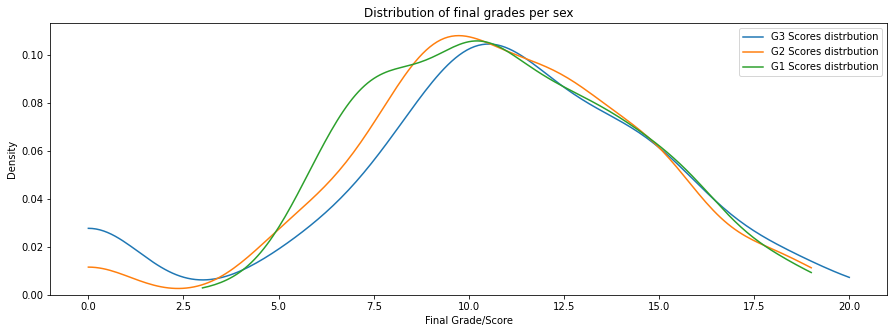

In [15]:
print(df["sex"].value_counts())
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(15,5))


sns.kdeplot(data=df,x="G3", ax=ax,label="G3 Scores distrbution",cut=0)
sns.kdeplot(data=df,x="G2",  ax=ax,label="G2 Scores distrbution",cut=0)
sns.kdeplot(data=df,x="G1", ax=ax,label="G1 Scores distrbution",cut=0)
ax.legend()
ax.set_xlabel("Final Grade/Score")
ax.set_title("Distribution of final grades per sex")


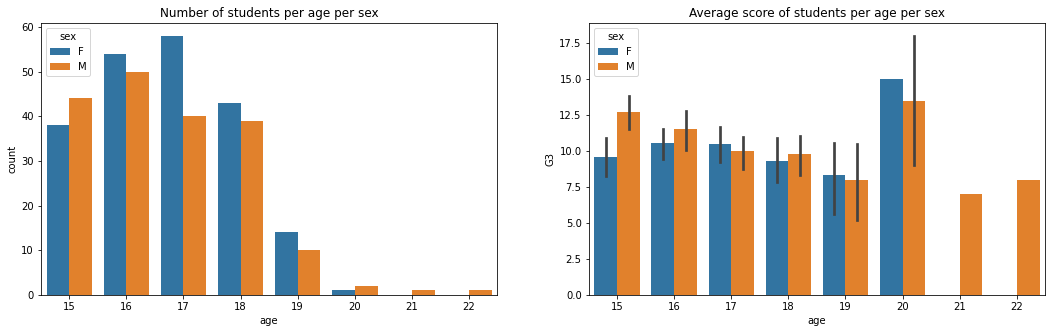

In [16]:
fig, [ax,ax2] = plt.subplots(nrows=1,ncols=2,figsize=(18,5))

sns.countplot(x="age",hue="sex", data=df,ax=ax)
ax.set_title("Number of students per age per sex")

sns.barplot(x="age", y = "G3", hue="sex", data=df,ax=ax2)
ax2.set_title("Average score of students per age per sex")

plt.show()

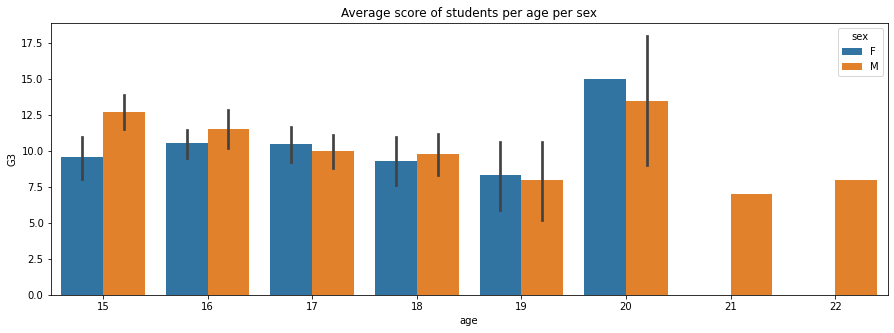

In [17]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(15,5))


sns.barplot(x="age", y = "G3", hue="sex", data=df,ax=ax)
ax.set_title("Average score of students per age per sex")

plt.show()

In [18]:
categorical_variables = list(df.select_dtypes(include=["object"]).columns) + ["Medu","Fedu","traveltime","studytime","famrel","freetime","goout","Dalc","Walc","health","age"]

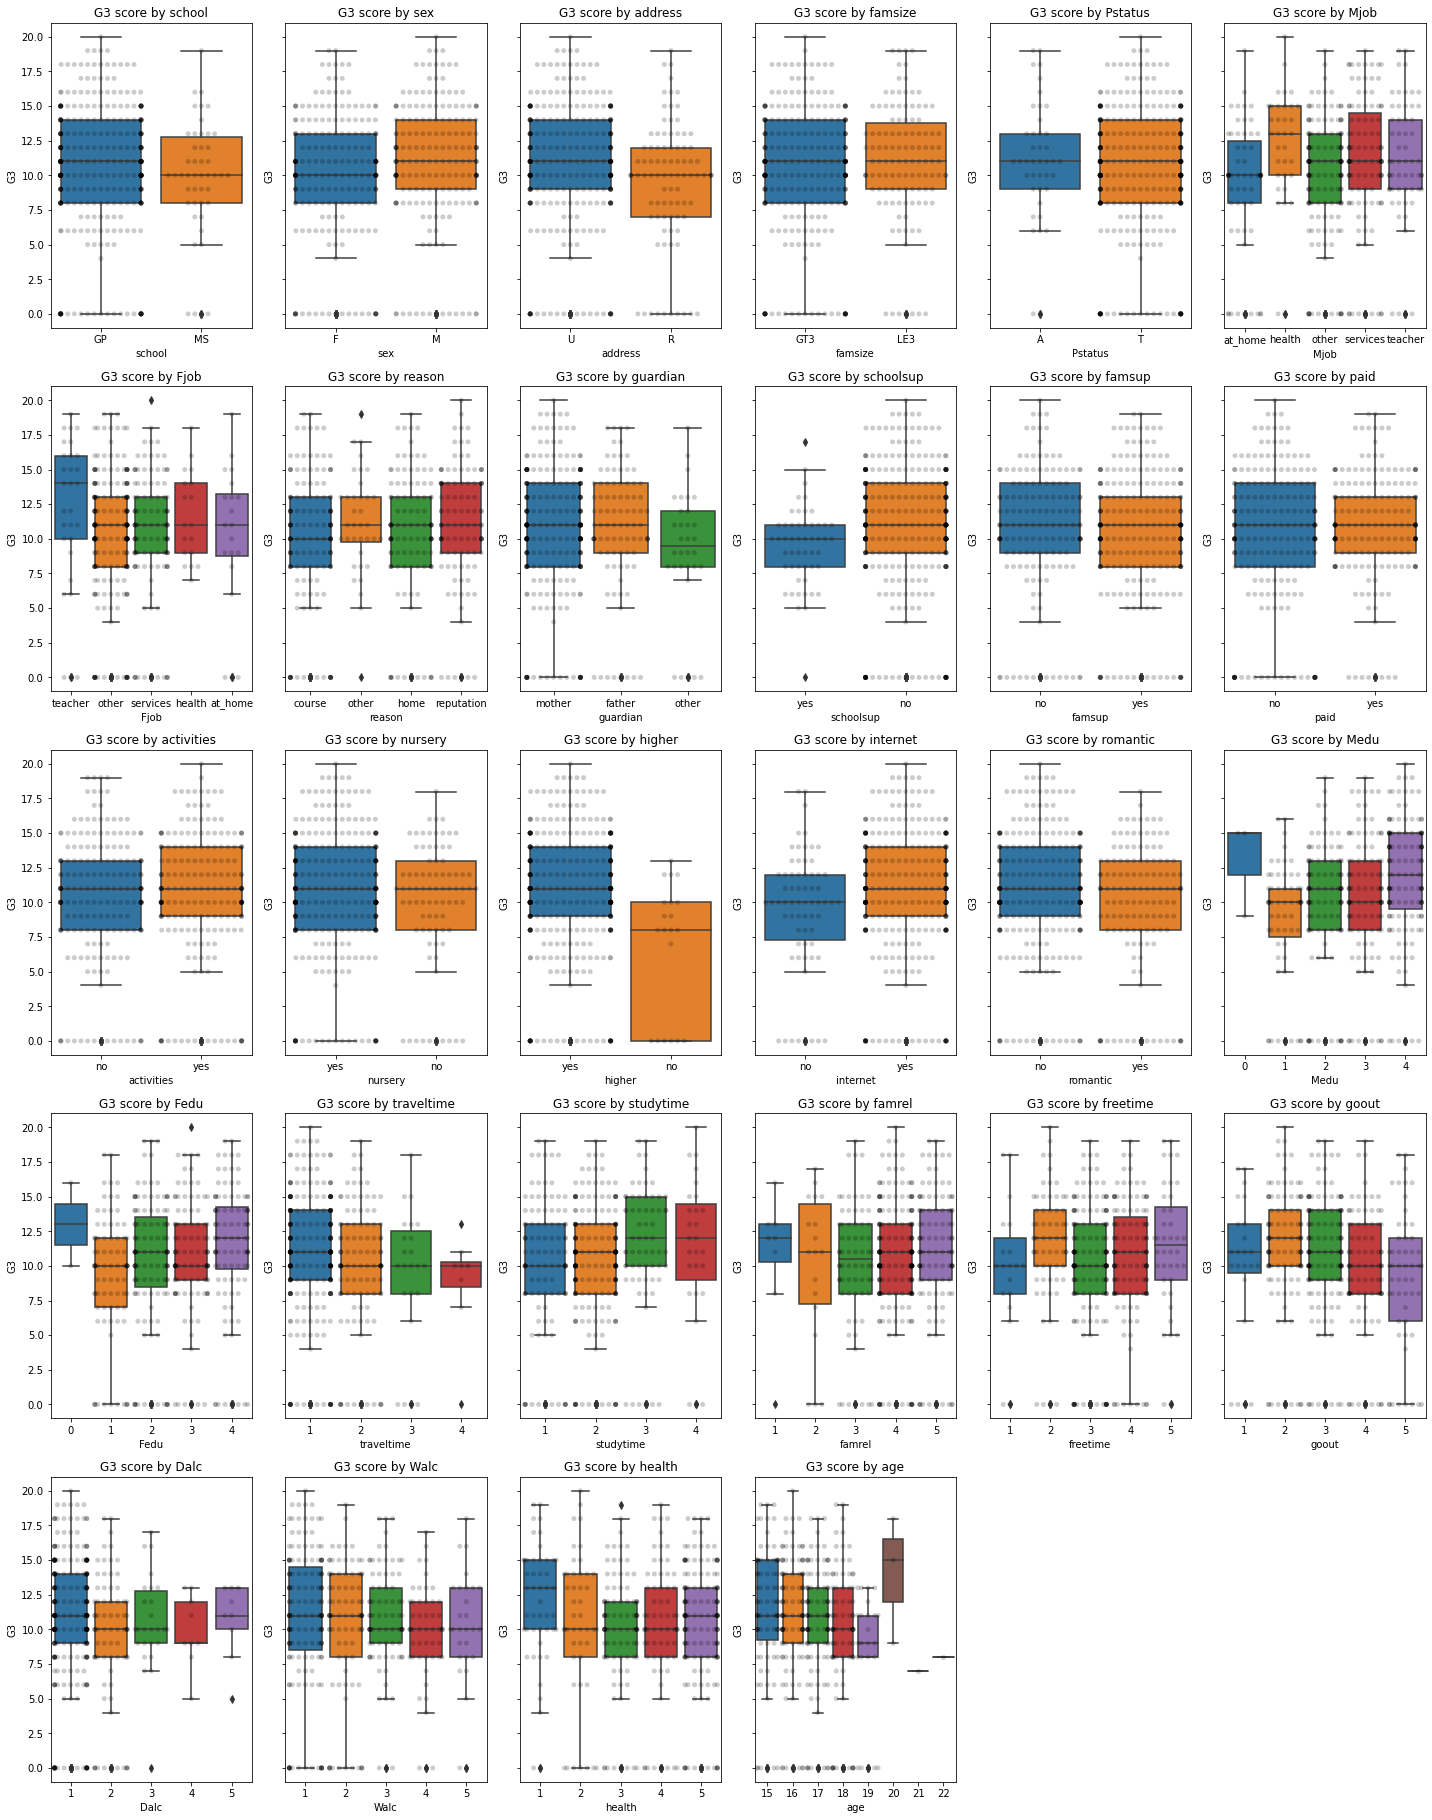

In [19]:
num_variable = len(categorical_variables)
n = np.ceil(np.sqrt(num_variable))
plt.figure(figsize=(20,30),tight_layout=True)
for i,c in enumerate(categorical_variables):
    plt.subplot(n,n,i+1)
    ax = sns.boxplot(data=df[["G3",c]],x=c,y="G3")
    ax = sns.swarmplot(data=df[["G3",c]],x=c,y="G3",color="black",alpha=0.2)
    ax.set_title("G3 score by %s"%c)
    if (i+1)%n!=1:
        ax.set_yticklabels([])
plt.show()


## Encode categorical variables into numerical variables

In [20]:
categorical_variables = list(df.select_dtypes(include=["object"]).columns)
binary_columns = ["address","Pstatus","schoolsup","famsup","paid","activities","nursery","higher","internet","romantic","sex","famsize","school"]
multicat_columns = ["Mjob","Fjob","reason","guardian"]

df_encoded = pd.get_dummies(data=df,columns=binary_columns,prefix=binary_columns,drop_first=True)
df_encoded = pd.get_dummies(data=df_encoded,columns=multicat_columns,prefix=multicat_columns,drop_first=False)


Let's encode binary variables by only one variable and not two.

In [21]:
G3_correlations = df_encoded.corr(method="spearman")[["G3"]]
G3_correlations["absolute_correlation"] = np.abs(G3_correlations["G3"])
G3_correlations.sort_values(by="absolute_correlation",ascending=False,inplace=True)

In [22]:
G3_correlations

G3  absolute_correlation
G3                 1.000000              1.000000
G2                 0.957125              0.957125
G1                 0.878001              0.878001
failures          -0.361224              0.361224
Medu               0.225036              0.225036
age               -0.173438              0.173438
higher_yes         0.172418              0.172418
Fedu               0.170049              0.170049
goout             -0.166119              0.166119
schoolsup_yes     -0.150598              0.150598
Mjob_health        0.132115              0.132115
Dalc              -0.120944              0.120944
traveltime        -0.120530              0.120530
address_U          0.119457              0.119457
Fjob_teacher       0.117794              0.117794
Mjob_at_home      -0.116059              0.116059
internet_yes       0.107816              0.107816
studytime          0.105170              0.105170
Walc              -0.104459              0.104459
sex_M              0.103151              0.103151
Mjob_other        -0.100843              0.100843
guardian_other    -0.095440              0.095440
reason_reputation  0.091676              0.091676
romantic_yes      -0.091460              0.091460
reason_course     -0.086867              0.086867
Mjob_services      0.086252              0.086252
famsize_LE3        0.066279              0.066279
school_MS         -0.064571              0.064571
paid_yes           0.060924              0.060924
Fjob_other        -0.059396              0.059396
famrel             0.054977              0.054977
famsup_yes        -0.050482              0.050482
health            -0.047790              0.047790
Pstatus_T         -0.044262              0.044262
Mjob_teacher       0.041701              0.041701
guardian_father    0.038936              0.038936
Fjob_health        0.035761              0.035761
reason_other       0.035209              0.035209
nursery_yes        0.031752              0.031752
activities_yes     0.026090              0.026090
guardian_mother    0.021016              0.021016
reason_home       -0.019602              0.019602
Fjob_services     -0.019121              0.019121
absences           0.017731              0.017731
freetime          -0.004994              0.004994
Fjob_at_home      -0.000153              0.000153

<AxesSubplot:>

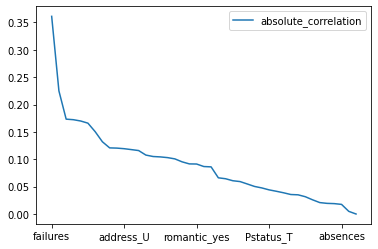

In [23]:
G3_correlations[3:].plot(y="absolute_correlation")

### We select variable having a min_correlation with the G3 variable (We exclude  G2,G1)

### Let's have a look at the relationships between our variables and the G3 variable to predict

In [24]:
min_correlation = 0.1
dataset = df_encoded[G3_correlations[G3_correlations["absolute_correlation"]>=min_correlation].index]

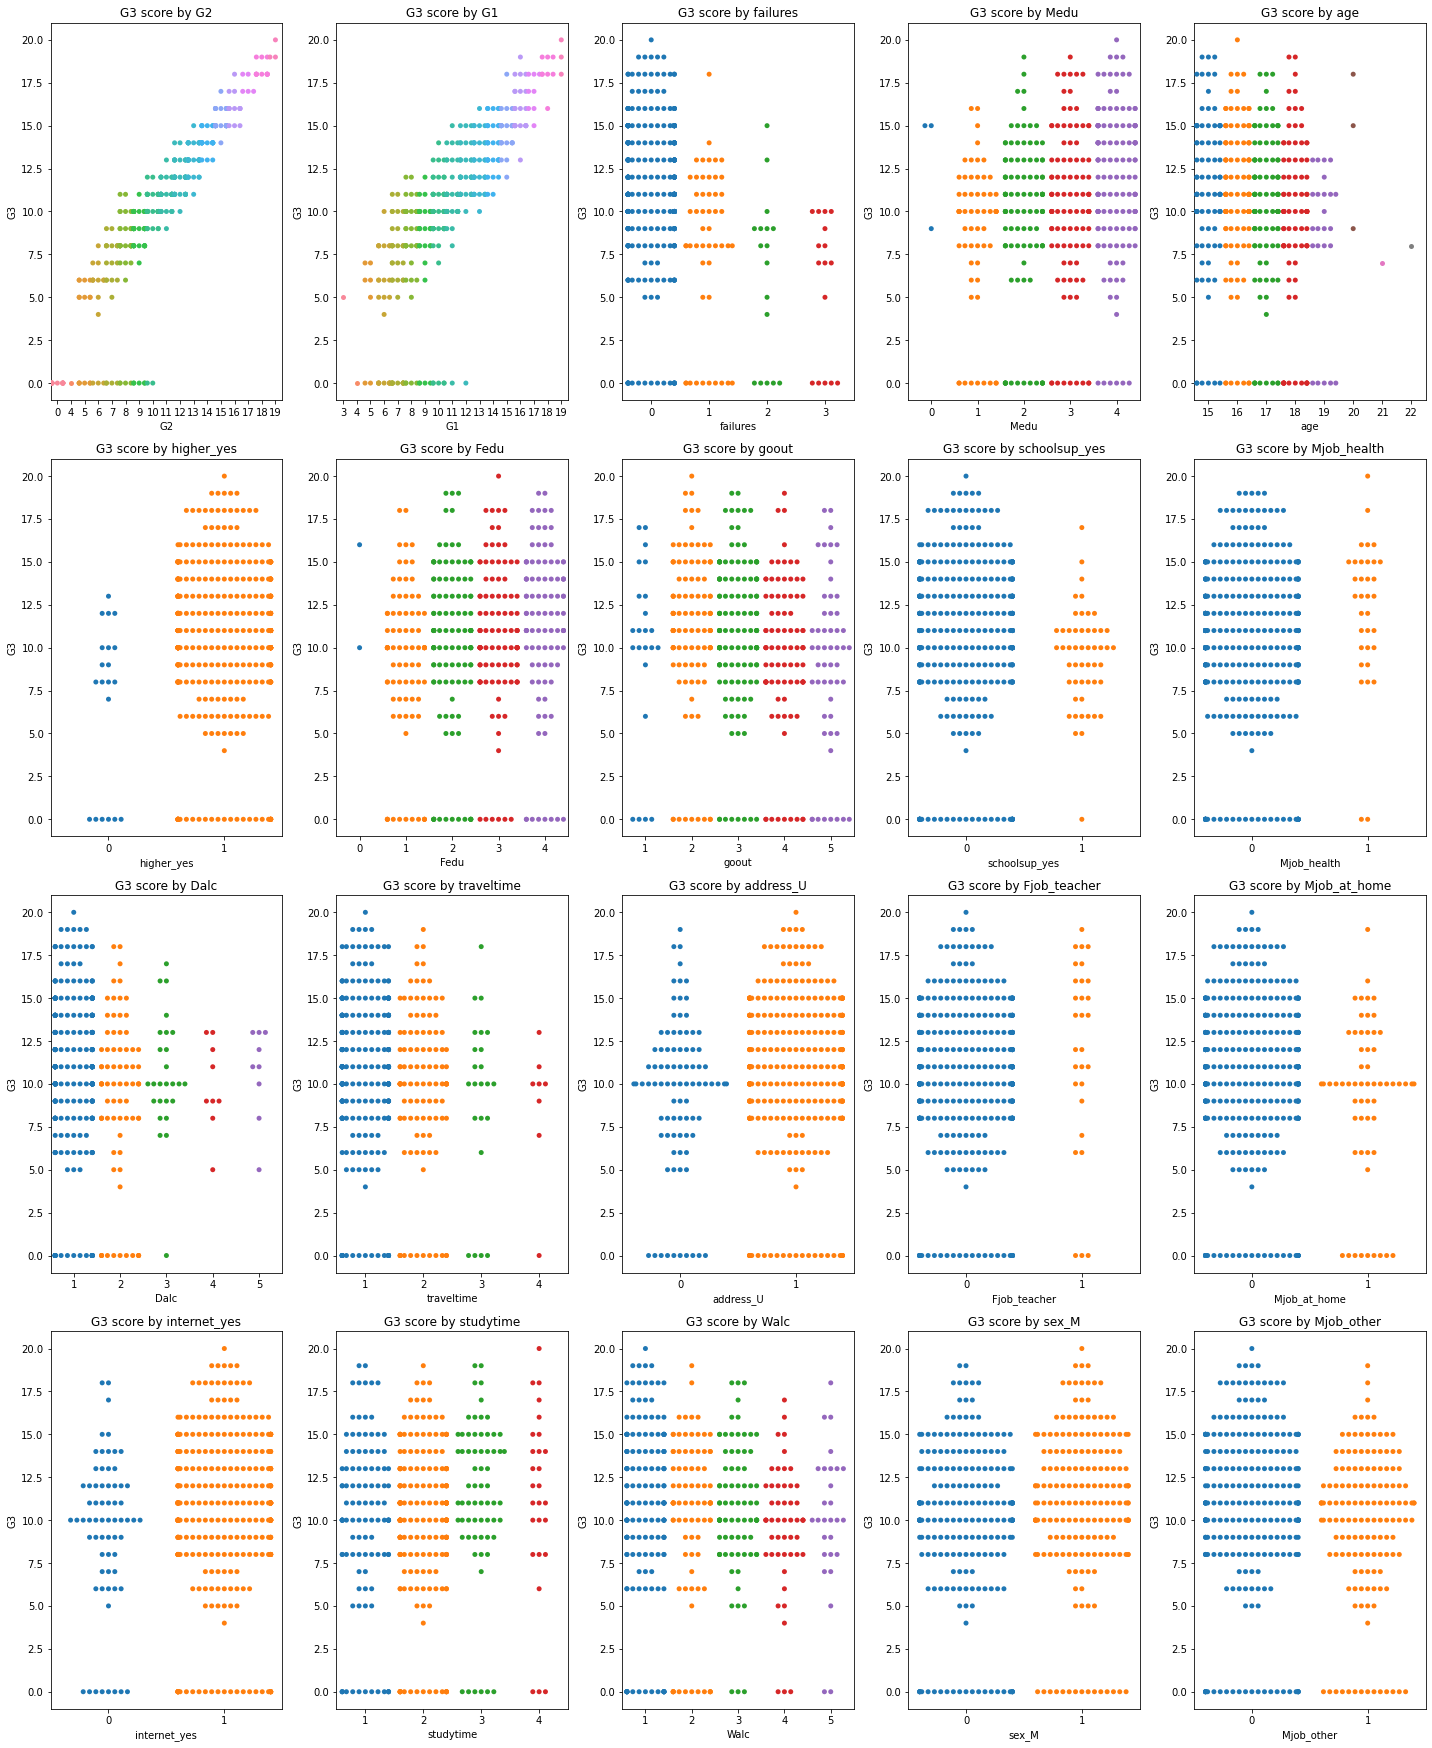

In [25]:
dataset_columns = list(dataset.columns)
dataset_columns.remove("G3")
num_variable = len(dataset_columns)
n = np.ceil(np.sqrt(num_variable))
plt.figure(figsize=(20,30),tight_layout=True)
for i,c in enumerate(dataset_columns):
    plt.subplot(n,n,i+1)
    ax = sns.swarmplot(data=dataset[["G3",c]],x=c,y="G3")
    ax.set_title("G3 score by %s"%c)
    #if (i+1)%n!=1:
    #    ax.set_yticklabels([])
plt.show()

In [26]:
explanatory_variables = list(dataset.columns)
explanatory_variables.remove("G3")
explanatory_variables.remove("G2")
explanatory_variables.remove("G1")
y_label = ["G3"]
X_train,X_test, y_train, y_test = train_test_split(dataset[explanatory_variables],dataset[y_label],test_size=0.33 ,random_state=94)

## Baseline Model

### We will set a baseline model, for us to compare our future model and see if they perform better than a basic naive model predicting a single value. Let's assume a baseline model which predict for each indivual the median rate G3 in the training sample

In [48]:
class CustomBaseLineModel:

    median = None

    def fit(self,X_train, y_train):
        self.median = np.median(y_train)

    def predict(self, y_vector):

        return np.full(np.shape(y_vector),fill_value=self.median)

In [49]:
cbm = CustomBaseLineModel()
cbm.fit(X_train,y_train)


In [54]:
print(root_mean_squared_error(cbm.predict(y_test),y_test))
print(mean_absolute_error(cbm.predict(y_test),y_test))

G3    4.455891
dtype: float64
G3    3.290076
dtype: float64


Baseline Model performance : 

    * MAE : 4.456
    * RMSE : 3.290

## Lineal Regression Models

In [27]:
from sklearn import linear_model

In [28]:
lm  = linear_model.LinearRegression(fit_intercept=True)
lm.fit(X_train,y_train)

In [55]:
print(mean_absolute_error(lm.predict(X_test),y_test))
print(root_mean_squared_error(lm.predict(X_test),y_test))

G3    3.081965
dtype: float64
G3    4.035165
dtype: float64


Linear Regression Model without regularization Performance :

    * MAE : 3.081965
    * RMSE : 4.035165

G3    4.035165
dtype: float64